In [1]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
filesuffixes = [
    # '_for_experiment_not_screened_cols_top_50_features_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_screened_cols_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'
    ]

In [3]:
cv_analytics_utils: Dict[str, CvAnalyticsUtil] = {}

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials


Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.999403 | 0.000113276 | 0.999204 | 0.999704 |
| recall__class_0    | 0.999761 | 0.000184215 | 0.999304 | 1        |
| f1-score__class_0  | 0.999582 | 0.000108592 | 0.999353 | 0.999753 |
| precision__class_1 | 0.418175 | 0.310849    | 0        | 1        |
| recall__class_1    | 0.194048 | 0.148772    | 0        | 0.625    |
| f1-score__class_1  | 0.247718 | 0.167636    | 0        | 0.666667 |
| accuracy           | 0.999164 | 0.000217008 | 0.998708 | 0.999507 |
| auc                | 0.925187 | 0.0774096   | 0.730599 | 0.998342 |
+--------------------+----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


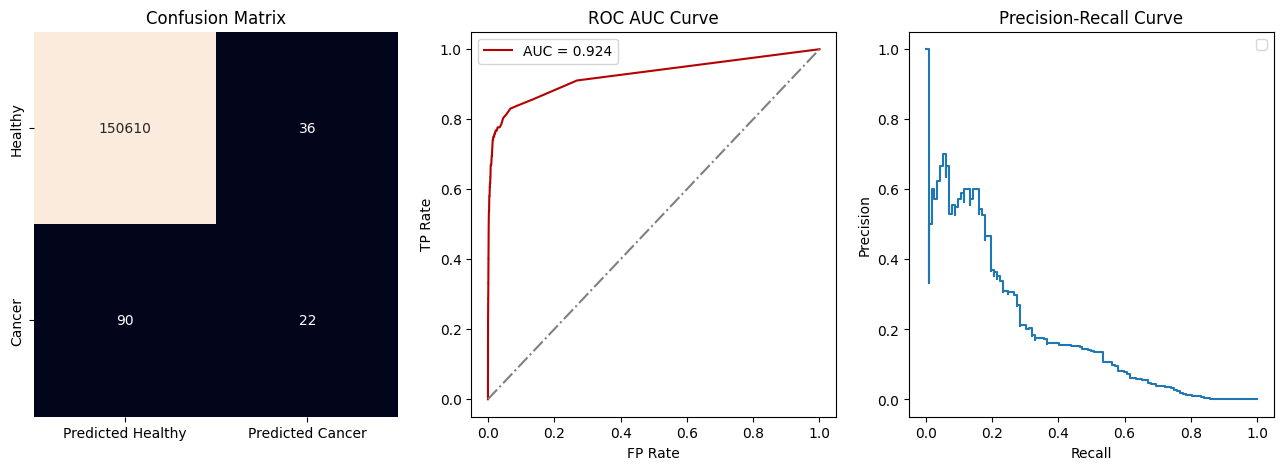

_for_experiment_screened_cols_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials


Cross-Validation measures:
+--------------------+-----------+-------------+-----------+----------+
|                    |      mean |         std |       min |      max |
|--------------------+-----------+-------------+-----------+----------|
| precision__class_0 | 0.999537  | 0.000141567 | 0.999394  | 0.9999   |
| recall__class_0    | 0.988423  | 0.00175443  | 0.983683  | 0.99034  |
| f1-score__class_0  | 0.993948  | 0.000902554 | 0.991476  | 0.994848 |
| precision__class_1 | 0.0244153 | 0.0120157   | 0.0120482 | 0.0625   |
| recall__class_1    | 0.384524  | 0.174425    | 0.25      | 0.875    |
| f1-score__class_1  | 0.0458731 | 0.022429    | 0.0229885 | 0.116667 |
| accuracy           | 0.987973  | 0.00178124  | 0.9831    | 0.98975  |
| auc                | 0.890161  | 0.107141    | 0.585611  | 0.990347 |
+--------------------+-----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


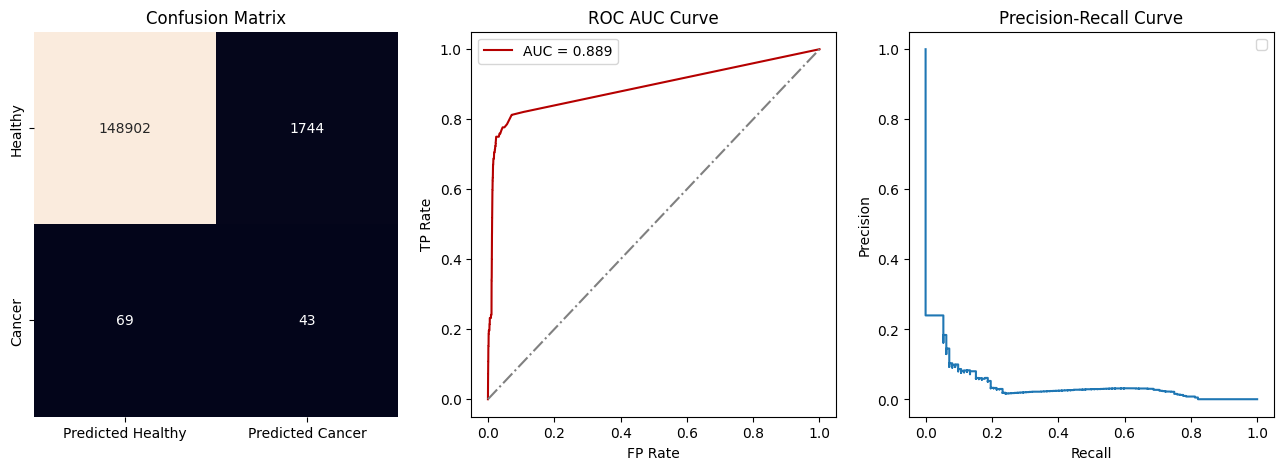

In [4]:
for filesuffix in filesuffixes:
    print(filesuffix)
    cv_analytics_util = load_cv_analytics_util_see_stats(filesuffix)
    cv_analytics_utils[filesuffix] = cv_analytics_util

In [8]:
def isin_filter(df: pd.DataFrame, col: str, values: List):
    return df[df[col].isin(values)]

def ovar_but_not_label_now(df: pd.DataFrame, label: str):
    return df[(df[label] == 0) & (df['ovar_cancer'] == 1) & (df['ovar_cancer_years'] <= 5)]

# filtered_on = list(itertools.chain.from_iterable([zip([key]*len(vals), vals) for key, vals in differentiate_confusion_matrix_over.items()]))
differentiate_confusion_matrix_over = {
    'ovar_histtype': [
        ([2], lambda df: isin_filter(df, 'ovar_histtype', [2, -1])), 
        ([4], lambda df: isin_filter(df, 'ovar_histtype', [4, -1])), 
        ([6], lambda df: isin_filter(df, 'ovar_histtype', [6, -1])), 
        ([8], lambda df: isin_filter(df, 'ovar_histtype', [8, -1])), 
        ([9], lambda df: isin_filter(df, 'ovar_histtype', [9, -1])), 
        ([31], lambda df: isin_filter(df, 'ovar_histtype', [31, -1])),  
        ([34], lambda df: isin_filter(df, 'ovar_histtype', [34, -1])), 
        # ([39], lambda df: isin_filter(df, 'ovar_histtype', [39])),
        ([2, 4, 6, 8, 9, 31], lambda df: isin_filter(df, 'ovar_histtype', [2, 4, 6, 8, 9, 31, -1]))
    ]
}

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 0
Threshold: 0.013333333333333334


Cross-Validation measures:
+--------------------+----------+-----------+----------+-------+
|                    |     mean |       std |      min |   max |
|--------------------+----------+-----------+----------+-------|
| precision__class_0 | 1        | 0         | 1        |     1 |
| recall__class_0    | 0.868757 | 0.128891  | 0.625    |     1 |
| f1-score__class_0  | 0.924815 | 0.0770902 | 0.769231 |     1 |
| accuracy           | 0.868757 | 0.128891  | 0.625    |     1 |
+--------------------+----------+-----------+----------+-------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


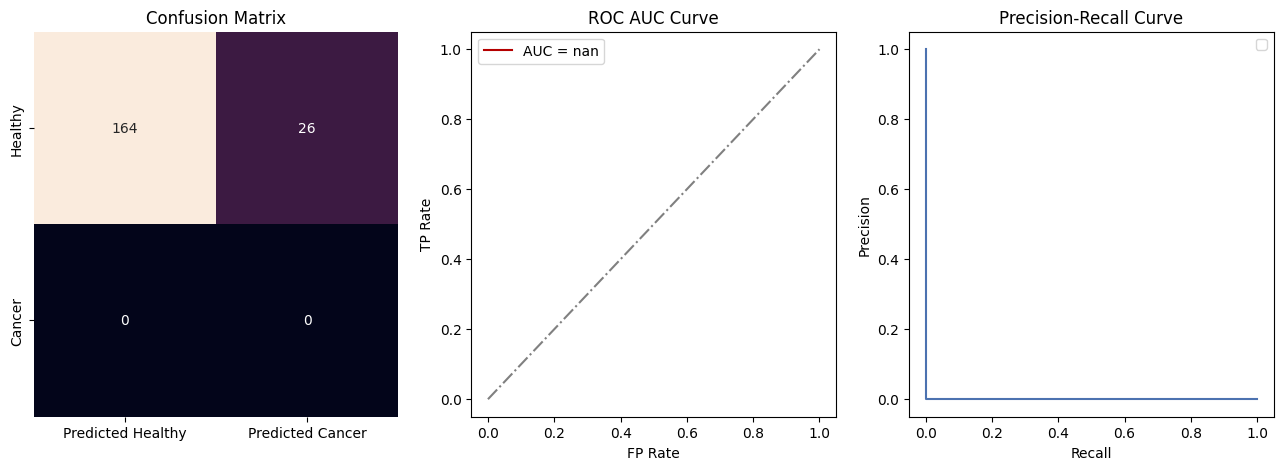

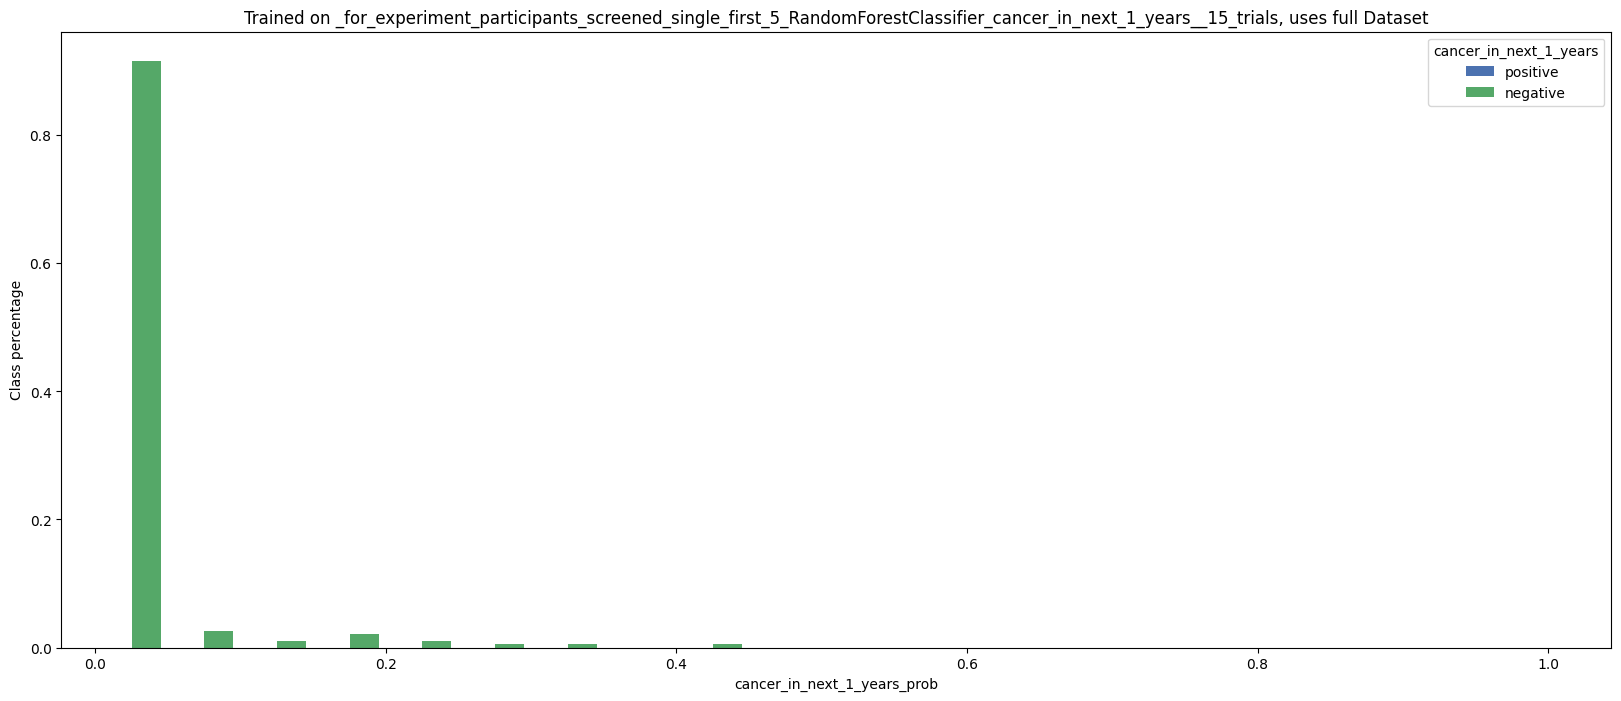

_for_experiment_screened_cols_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 0
Threshold: 0.006666666666666667


Cross-Validation measures:
+--------------------+----------+-----------+----------+-------+
|                    |     mean |       std |      min |   max |
|--------------------+----------+-----------+----------+-------|
| precision__class_0 | 1        | 0         | 1        |     1 |
| recall__class_0    | 0.835865 | 0.131509  | 0.625    |     1 |
| f1-score__class_0  | 0.905289 | 0.0794721 | 0.769231 |     1 |
| accuracy           | 0.835865 | 0.131509  | 0.625    |     1 |
+--------------------+----------+-----------+----------+-------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


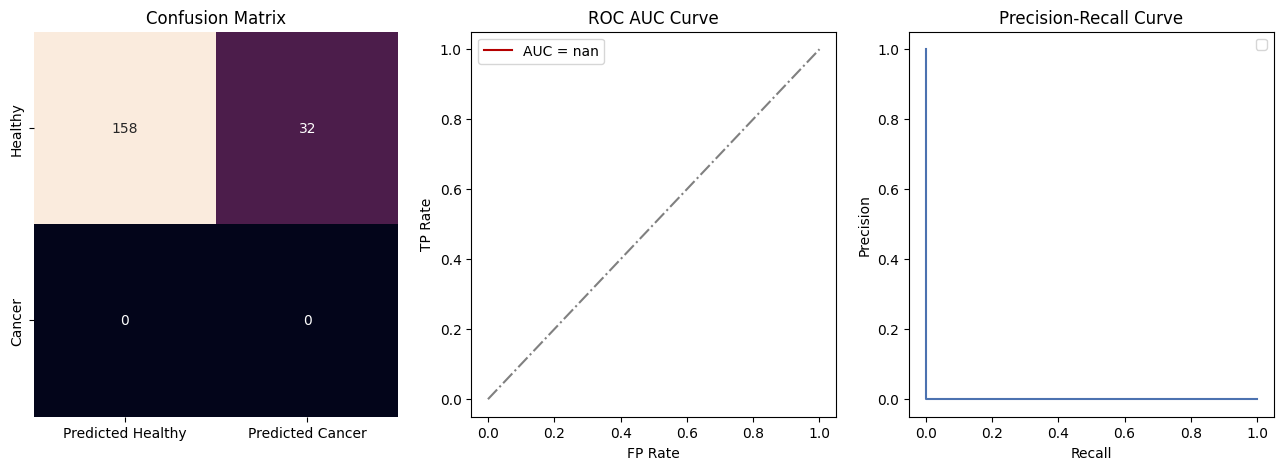

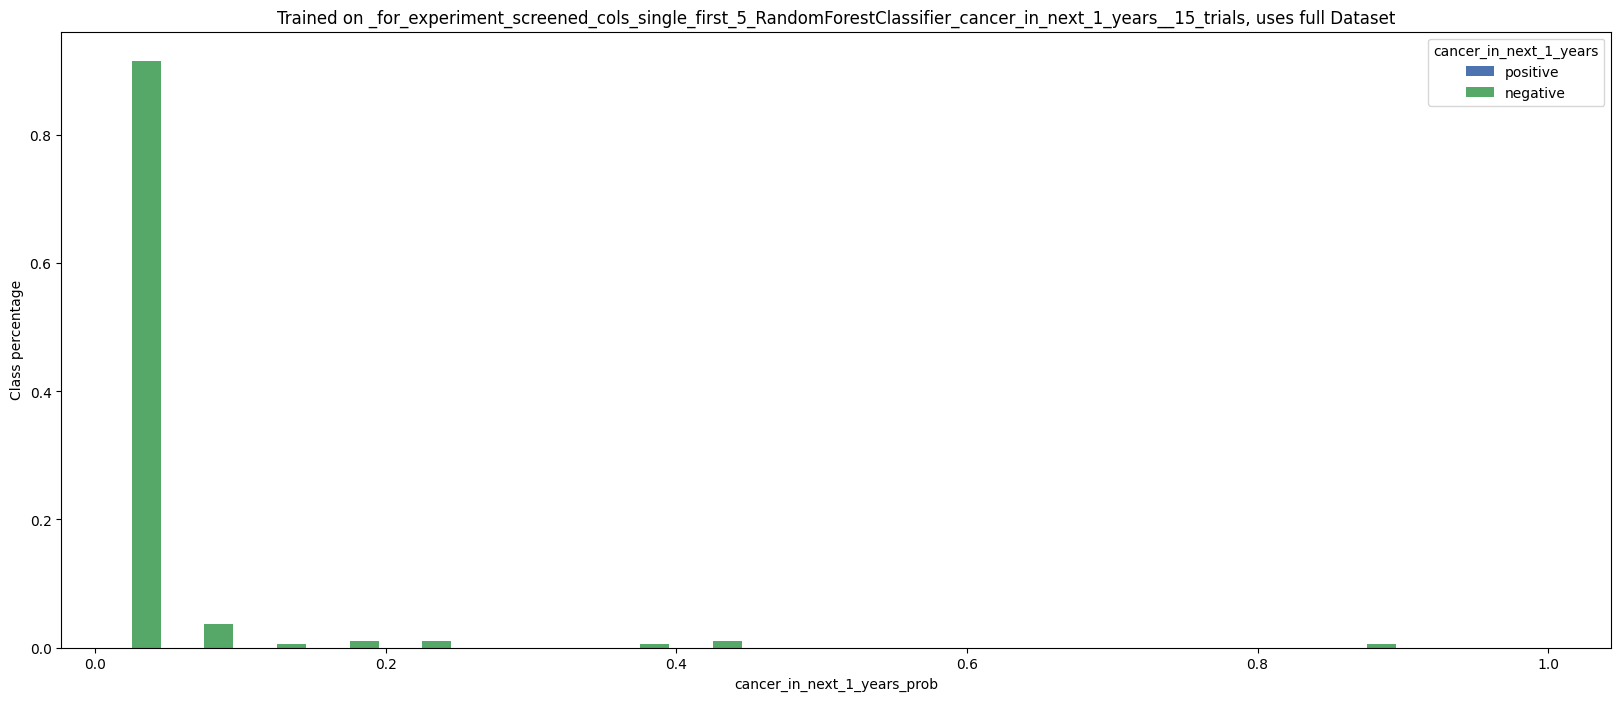

In [9]:
for filesuffix, cv_analytics_util in cv_analytics_utils.items():
    print(filesuffix)
    label = cv_analytics_util.get_label()
    classifier_name = cv_analytics_util.get_classifier_type()
    based_on = 'questionaire'
    if 'screened' in filesuffix:
        based_on += ' + screening'
    
    if 'single' in filesuffix:
        cv_analytics_util.merge_in_dataset(get_screened_first_5_no_process_dataset(label = label))
    # Plot
    cv_analytics_util.set_filter(None)
    threshold = cv_analytics_util.get_optimal_operating_point()
    print(f"Threshold: {threshold}")
    cv_analytics_util.set_filter(lambda df: ovar_but_not_label_now(df, label))
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    # End Plot
    full_dataset = cv_analytics_util.get_dataset_with_predictions()
    full_dataset_cancer = extract_full_dataset_filter_cancer(full_dataset)
    full_dataset_no_cancer = extract_full_dataset_filter_no_cancer(full_dataset)

    title_caner = f'Change in probability of getting cancer for those who develop it based on {based_on} using {classifier_name} classifier'
    title_no_caner = f'Change in probability of getting cancer for those who don\'t develop it based on {based_on} using {classifier_name} classifier'

    plot_hist_side_by_side_for_class(ovar_but_not_label_now(full_dataset, label), label, f'{label}_prob', normalize = True, title=f'Trained on {filesuffix}, uses full Dataset')
    plt.show()

In [ ]:
source_df

,plco_id,ca125_result,ca125ii_level,ca125ii_level_binary,cancer_in_next_1_years,cyst,cystw,detl_p,detr_p,echo,...,tvu_ref,tvu_result,visboth,viseith,visl,visr,volum,was_screened,cancer_in_next_1_years_pred,cancer_in_next_1_years_prob
1241,A-038636-9,1.0,15.0,1.0,0.0,1.078264,1.010344,0.0,0.0,1.373222,...,4.0,1.0,0.0,0.0,0.0,0.0,8.212661,1.0,0.0,0.0
1242,A-038636-9,1.0,15.0,1.0,0.0,1.078264,1.010344,0.0,0.0,1.373222,...,4.0,1.0,0.0,0.0,0.0,0.0,8.212661,1.0,0.0,0.0
2828,A-069164-3,1.0,5.0,1.0,0.0,1.078264,1.010344,0.0,0.0,1.373222,...,4.0,1.0,0.0,0.0,0.0,0.0,8.212661,1.0,0.0,0.0
2829,A-069164-3,1.0,5.0,1.0,0.0,1.078264,1.010344,0.0,1.0,1.373222,...,4.0,1.0,0.0,1.0,0.0,1.0,8.212661,1.0,0.0,0.0
2830,A-069164-3,1.0,5.0,1.0,0.0,1.078264,1.010344,1.0,0.0,1.373222,...,4.0,1.0,0.0,1.0,1.0,0.0,8.212661,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139840,Y-115755-3,1.0,27.0,1.0,0.0,1.000000,1.000000,0.0,1.0,1.000000,...,3.0,3.0,0.0,1.0,0.0,1.0,0.399902,1.0,0.0,0.0
147839,Z-105757-1,1.0,11.0,1.0,0.0,1.080256,1.010520,1.0,1.0,1.373476,...,4.0,1.0,1.0,1.0,1.0,1.0,8.301079,1.0,0.0,0.0
147840,Z-105757-1,1.0,14.0,1.0,0.0,1.080256,1.010520,0.0,1.0,1.373476,...,4.0,1.0,0.0,1.0,0.0,1.0,8.301079,1.0,0.0,0.0
147841,Z-105757-1,1.0,13.0,1.0,0.0,1.080256,1.010520,1.0,1.0,1.373476,...,4.0,1.0,1.0,1.0,1.0,1.0,8.301079,1.0,0.0,0.0
